### **Importando bibliotecas**

In [922]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker


### **Leitura do arquivo .csv**

In [923]:
google_playstore_df = pd.read_csv('googleplaystore.csv')
display(google_playstore_df.head())
print(google_playstore_df.shape)
display(google_playstore_df.info())
print(google_playstore_df.isnull().sum())


,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.10,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.90,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.70,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.50,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.30,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


(10841, 13)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


None

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64


### **1. Tratamento dos dados**

#### Exclusão e preenchimento de nulos

In [924]:
# Colunas Type, Content Rating, Curret Ver e Android Ver
google_playstore_df = google_playstore_df.dropna(subset=['Type', 'Content Rating', 'Current Ver', 'Android Ver'])

# Coluna Rating
google_playstore_df['Rating'] = google_playstore_df['Rating'].fillna(google_playstore_df['Rating'].mean())
print(google_playstore_df.isnull().sum())


App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       0
Android Ver       0
dtype: int64


#### Conversão dos tipos

In [925]:
# Conversão das colunas Reviews, Installs, Price e Last Updated
google_playstore_df['Reviews'] = google_playstore_df['Reviews'].str.replace(',', '').astype(float).astype(int)
google_playstore_df['Installs'] = google_playstore_df['Installs'].str.replace(',', '').str.replace('+', '').astype(float)
google_playstore_df['Price'] = google_playstore_df['Price'].str.replace('$', '').astype(float)
google_playstore_df['Last Updated'] = pd.to_datetime(google_playstore_df['Last Updated'], format='%B %d, %Y')

# Conversão da coluna Size 
def tamanho(Size):
    if 'M' in Size:
        return float(Size.replace('M', '').replace(' ', ''))
    elif 'k' in Size:
        return float(Size.replace('k', '').replace(' ', '')) / 1024 
    return None 

google_playstore_df['Size'] = google_playstore_df['Size'].apply(tamanho)

# Limpeza dos dados da coluna Category
print(google_playstore_df['Category'].unique())
google_playstore_df['Category'] = google_playstore_df['Category'].str.replace('_', ' ').str.title()

# Visualização
display(google_playstore_df.dtypes)
display(google_playstore_df.head())



['ART_AND_DESIGN' 'AUTO_AND_VEHICLES' 'BEAUTY' 'BOOKS_AND_REFERENCE'
 'BUSINESS' 'COMICS' 'COMMUNICATION' 'DATING' 'EDUCATION' 'ENTERTAINMENT'
 'EVENTS' 'FINANCE' 'FOOD_AND_DRINK' 'HEALTH_AND_FITNESS' 'HOUSE_AND_HOME'
 'LIBRARIES_AND_DEMO' 'LIFESTYLE' 'GAME' 'FAMILY' 'MEDICAL' 'SOCIAL'
 'SHOPPING' 'PHOTOGRAPHY' 'SPORTS' 'TRAVEL_AND_LOCAL' 'TOOLS'
 'PERSONALIZATION' 'PRODUCTIVITY' 'PARENTING' 'WEATHER' 'VIDEO_PLAYERS'
 'NEWS_AND_MAGAZINES' 'MAPS_AND_NAVIGATION']


App                       object
Category                  object
Rating                   float64
Reviews                    int64
Size                     float64
Installs                 float64
Type                      object
Price                    float64
Content Rating            object
Genres                    object
Last Updated      datetime64[ns]
Current Ver               object
Android Ver               object
dtype: object

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,Art And Design,4.10,159,19.00,10000.00,Free,0.00,Everyone,Art & Design,2018-01-07,1.0.0,4.0.3 and up
1,Coloring book moana,Art And Design,3.90,967,14.00,500000.00,Free,0.00,Everyone,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",Art And Design,4.70,87510,8.70,5000000.00,Free,0.00,Everyone,Art & Design,2018-08-01,1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,Art And Design,4.50,215644,25.00,50000000.00,Free,0.00,Teen,Art & Design,2018-06-08,Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,Art And Design,4.30,967,2.80,100000.00,Free,0.00,Everyone,Art & Design;Creativity,2018-06-20,1.1,4.4 and up


#### Verificação e exclusão dos dados duplicados

In [926]:
# Visualização dos dados duplicados
duplicados = google_playstore_df[google_playstore_df.duplicated()]
print(duplicados)

# Exclusão dos dados duplicados
google_playstore_df = google_playstore_df.drop_duplicates()
google_playstore_df = google_playstore_df.drop_duplicates(subset='App', keep='first')

# Visualização dos dados com 2 casas decimais
pd.set_option('display.float_format', '{:.2f}'.format)
display(google_playstore_df)

# Contagem dos dados duplicados
contagem_duplicados = google_playstore_df.duplicated().sum()
print(f"Número de linhas duplicadas: {contagem_duplicados}")


                                                   App      Category  Rating  \
229                       Quick PDF Scanner + OCR FREE      Business    4.20   
236                                                Box      Business    4.20   
239                                 Google My Business      Business    4.40   
256                                ZOOM Cloud Meetings      Business    4.40   
261                          join.me - Simple Meetings      Business    4.00   
...                                                ...           ...     ...   
8643                    Wunderlist: To-Do List & Tasks  Productivity    4.60   
8654   TickTick: To Do List with Reminder, Day Planner  Productivity    4.60   
8658                           ColorNote Notepad Notes  Productivity    4.60   
10049        Airway Ex - Intubate. Anesthetize. Train.       Medical    4.30   
10768                                             AAFP       Medical    3.80   

       Reviews  Size     Installs  Type

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,Art And Design,4.10,159,19.00,10000.00,Free,0.00,Everyone,Art & Design,2018-01-07,1.0.0,4.0.3 and up
1,Coloring book moana,Art And Design,3.90,967,14.00,500000.00,Free,0.00,Everyone,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",Art And Design,4.70,87510,8.70,5000000.00,Free,0.00,Everyone,Art & Design,2018-08-01,1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,Art And Design,4.50,215644,25.00,50000000.00,Free,0.00,Teen,Art & Design,2018-06-08,Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,Art And Design,4.30,967,2.80,100000.00,Free,0.00,Everyone,Art & Design;Creativity,2018-06-20,1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10836,Sya9a Maroc - FR,Family,4.50,38,53.00,5000.00,Free,0.00,Everyone,Education,2017-07-25,1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,Family,5.00,4,3.60,100.00,Free,0.00,Everyone,Education,2018-07-06,1.0,4.1 and up
10838,Parkinson Exercices FR,Medical,4.19,3,9.50,1000.00,Free,0.00,Everyone,Medical,2017-01-20,1.0,2.2 and up
10839,The SCP Foundation DB fr nn5n,Books And Reference,4.50,114,NaN,1000.00,Free,0.00,Mature 17+,Books & Reference,2015-01-19,Varies with device,Varies with device


Número de linhas duplicadas: 0


#### 2. Top 5 aplicativos mais instalados

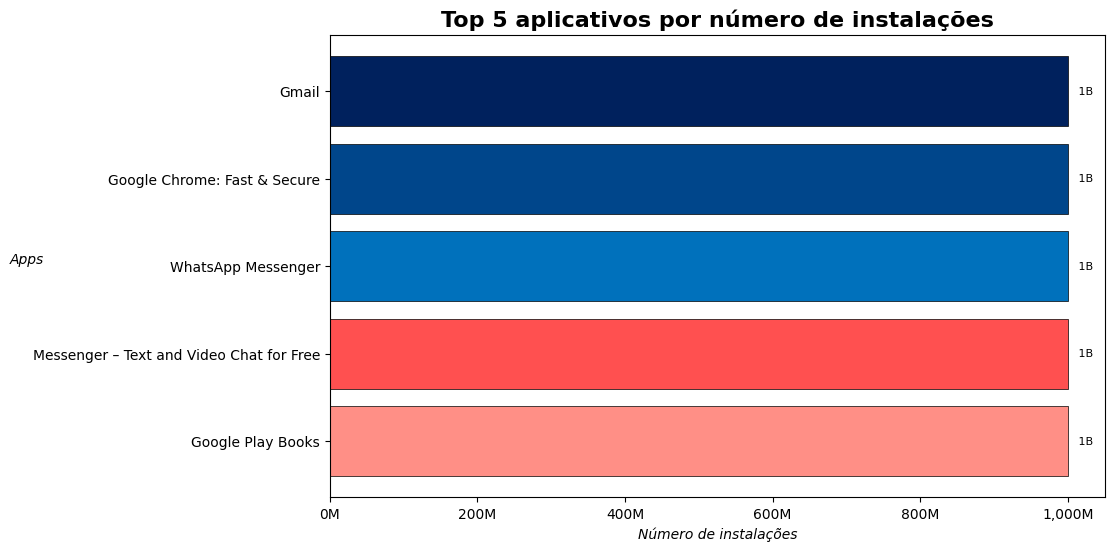

In [927]:
top_apps = google_playstore_df.nlargest(5, 'Installs')


plt.figure(figsize=(10, 6))
plt.barh(top_apps['App'], top_apps['Installs'], color=['#ff8f86','#ff5050','#0071bc','#00468b','#00215d'],
         edgecolor='black', linewidth=0.5)


for index, value in enumerate(top_apps['Installs']):
    plt.text(value, index, f'   {value/1e9:,.0f}B', ha='left', va='center', fontsize=8)


plt.title('Top 5 aplicativos por número de instalações', fontsize=16, fontweight='bold', color='black')
plt.xlabel('Número de instalações', fontsize=10, fontstyle='italic')
plt.ylabel('Apps', fontsize=10, fontstyle='italic', rotation=0)
eixo_x = mticker.FuncFormatter(lambda x, pos: '{:,.0f}'.format(x/1e6) + 'M')
plt.gca().xaxis.set_major_formatter(eixo_x)
plt.show()


#### 3. Frequência de categorias de aplicativos

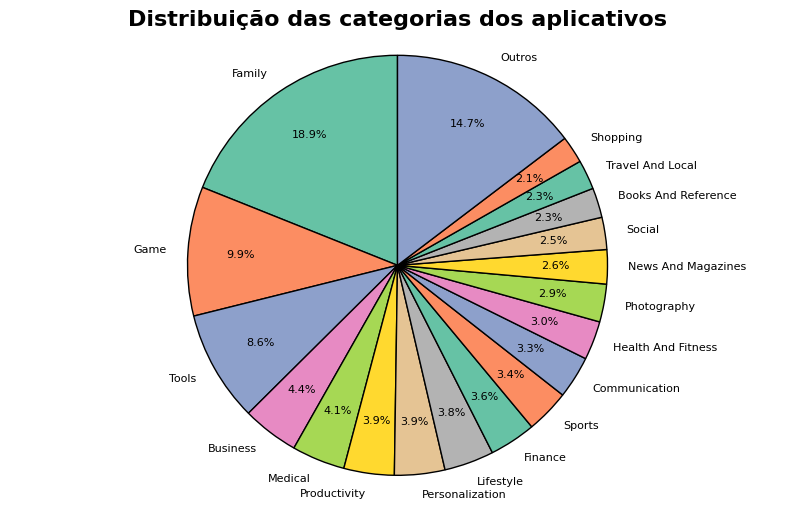

In [928]:
categoria = google_playstore_df['Category'].value_counts()


limite_outros = 200
categorias_filtradas = categoria[categoria >= limite_outros]
categorias_filtradas['Outros'] = categoria[categoria < limite_outros].sum()


plt.figure(figsize=(10, 6))
plt.pie(categorias_filtradas, labels=categorias_filtradas.index, autopct='%0.1f%%',
        textprops={'fontsize': 8}, startangle=90, colors=plt.cm.Set2.colors,
        wedgeprops={'edgecolor': 'black'}, pctdistance=0.75)

plt.title('Distribuição das categorias dos aplicativos', fontsize=16, fontweight='bold', color='black')
plt.axis('equal')
plt.show()


#### 4. Aplicativo mais caro

In [929]:
app_mais_caro = google_playstore_df.nlargest(1, 'Price')
display(app_mais_caro)


,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
4367,I'm Rich - Trump Edition,Lifestyle,3.60,275,7.30,10000.00,Paid,400.00,Everyone,Lifestyle,2018-05-03,1.0.1,4.1 and up


#### 5. Quantidade de aplicativos classificados como 'Mature 17+'

In [930]:
apps_mature_17 = google_playstore_df[google_playstore_df['Content Rating'] == 'Mature 17+']
numero_apps_mature_17 = apps_mature_17.shape[0]
print(f"O número de aplicativos classificados como 'Mature 17+' é de: {numero_apps_mature_17}")


O número de aplicativos classificados como 'Mature 17+' é de: 393


#### 6. Os 10 aplicativos com maior número de reviews

In [931]:
top_10_apps_reviews = google_playstore_df.nlargest(10, 'Reviews')[['App', 'Reviews']]
display(top_10_apps_reviews)


,App,Reviews
2544,Facebook,78158306
336,WhatsApp Messenger,69119316
2545,Instagram,66577313
335,Messenger – Text and Video Chat for Free,56642847
1670,Clash of Clans,44891723
4005,Clean Master- Space Cleaner & Antivirus,42916526
1654,Subway Surfers,27722264
3665,YouTube,25655305
7536,"Security Master - Antivirus, VPN, AppLock, Boo...",24900999
1660,Clash Royale,23133508


#### 7.1. Os 10 aplicativos piores avaliados

In [932]:
piores_10_apps_ratings = google_playstore_df.nsmallest(10, 'Rating')[['App', 'Rating']]
display(piores_10_apps_ratings)


,App,Rating
625,House party - live chat,1.00
4127,Speech Therapy: F,1.00
5151,Clarksburg AH,1.00
5978,Truck Driving Test Class 3 BC,1.00
6319,BJ Bridge Standard American 2018,1.00
6490,MbH BM,1.00
7144,CB Mobile Biz,1.00
7383,Thistletown CI,1.00
7427,CJ DVD Rentals,1.00
7806,CR Magazine,1.00


#### 7.2. Aplicativo com a atualização mais antiga

In [933]:
app_data_att_antiga = google_playstore_df.nsmallest(1, 'Last Updated')[['App', 'Last Updated']]

app_nome = app_data_att_antiga['App'].values[0]
ultima_att = pd.to_datetime(app_data_att_antiga['Last Updated'].values[0]).strftime('%d/%m/%Y')

print(f"O aplicativo com a atualização mais antiga é: {app_nome}, atualizado em: {ultima_att}")


O aplicativo com a atualização mais antiga é: FML F*ck my life + widget, atualizado em: 21/05/2010


#### 8.1. Mapa de calor do número de aplicativos instalados por categoria

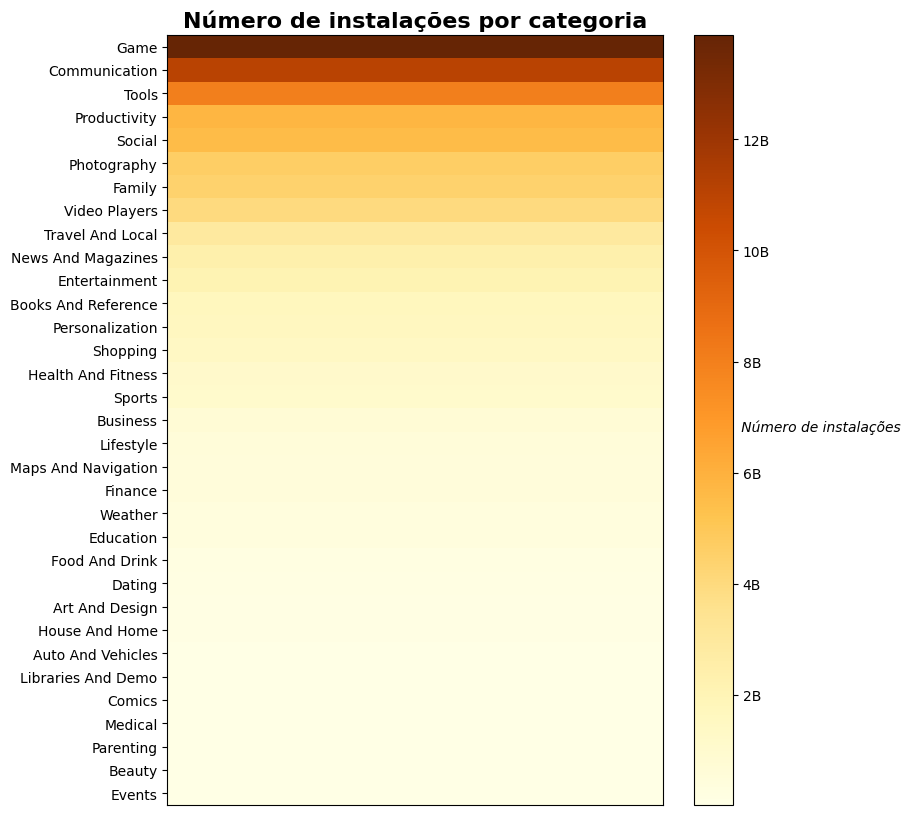

In [934]:
instalacao_categoria = google_playstore_df.groupby('Category')['Installs'].sum().reset_index()
instalacao_categoria = instalacao_categoria.sort_values(by='Installs', ascending=False)
categoria = instalacao_categoria['Category']
instalacao = instalacao_categoria['Installs']


plt.figure(figsize=(8, 10))
plt.imshow([[i] for i in instalacao], aspect='auto', cmap='YlOrBr')
plt.yticks(ticks=range(len(categoria)), labels=categoria, fontsize=10)
plt.xticks([])


cbar = plt.colorbar()
cbar.set_label('              Número de instalações', fontstyle='italic', labelpad=15, rotation=0)
cbar.ax.yaxis.set_major_formatter(mticker.FuncFormatter(lambda x, pos: '{:.0f}B'.format(x / 1e9)))


plt.title('Número de instalações por categoria', fontsize=16, fontweight='bold', color='black')
plt.show()


#### 8.2. Gráfico de número de instalações ao longo do tempo

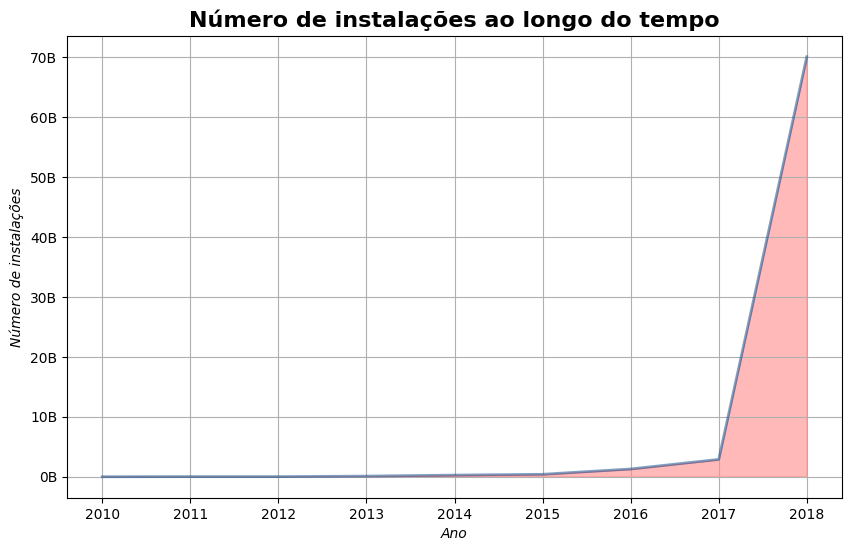

In [935]:
instalacoes_por_data = google_playstore_df.groupby(google_playstore_df['Last Updated'].dt.year)['Installs'].sum()

plt.figure(figsize=(10, 6))
plt.fill_between(instalacoes_por_data.index, instalacoes_por_data.values, color='#ff5050', alpha=0.4)
plt.plot(instalacoes_por_data.index, instalacoes_por_data.values, color='#00468b', alpha=0.5, linewidth=2)
plt.gca().yaxis.set_major_formatter(mticker.FuncFormatter(lambda x, _: f'{x / 1e9:,.0f}B'))
plt.title('Número de instalações ao longo do tempo', fontsize=16, fontweight='bold', color='black')
plt.xlabel('Ano', fontsize=10, fontstyle='italic')
plt.ylabel('Número de instalações', fontsize=10, fontstyle='italic')
plt.grid(True)
plt.show()
